Most "Important" words for forming topic distribution
game
overheal
reyna
team
fight
really
think
like
good
play
Top 10 words for topic #0:
['game', 'overheal', 'reyna', 'team', 'fight', 'really', 'think', 'like', 'good', 'play']


Top 10 words for topic #1:
['literally', 'ult', 'end', 'players', 'good', 'reyna', 'like', 'game', 'kill', 'play']


Top 10 words for topic #2:
['theyre', 'team', 'kill', 'decay', 'orb', 'pro', 'play', 'smoke', 'use', 'ult']


Top 10 words for topic #3:
['really', 'omen', 'play', 'duelist', 'controller', 'jett', 'lose', 'like', 'game', 'think']


Top 10 words for topic #4:
['dont', 'make', 'agent', 'im', 'say', 'want', 'like', 'time', 'think', 'play']


Top 10 words for topic #5:
['want', 'way', 'isnt', 'val', 'rush', 'point', 'die', 'character', 'revive', 'ignore']


Top 10 words for topic #6:
['character', 'like', 'people', 'fuck', 'hurt', 'annoy', 'game', 'harm', 'feel', 'say']


Top 10 words for topic #7:
['mean', 'play', 'create', 'like', 'space', 'use'

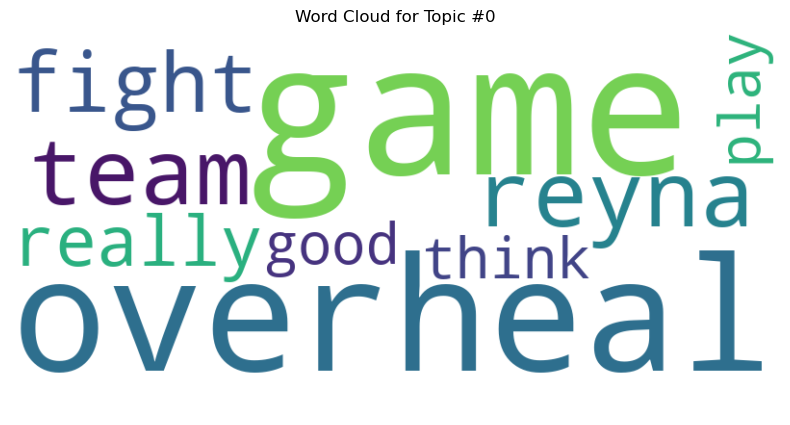

['literally', 'ult', 'end', 'players', 'good', 'reyna', 'like', 'game', 'kill', 'play']


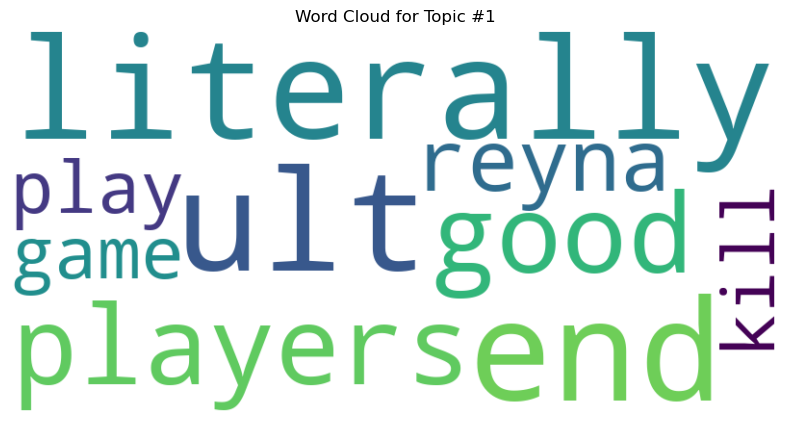

['theyre', 'team', 'kill', 'decay', 'orb', 'pro', 'play', 'smoke', 'use', 'ult']


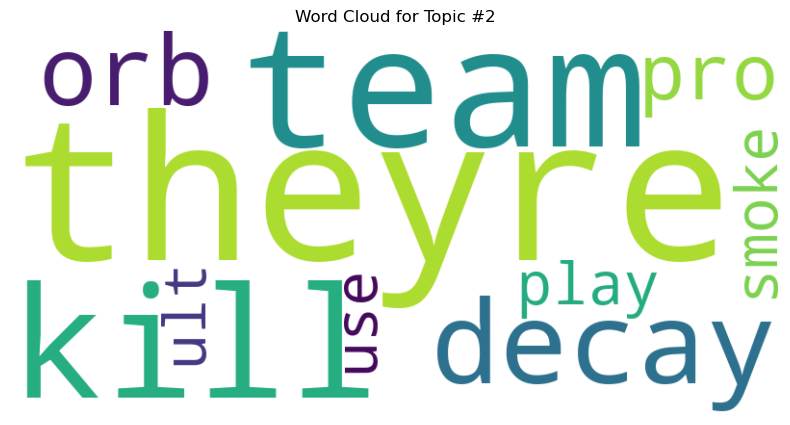

['really', 'omen', 'play', 'duelist', 'controller', 'jett', 'lose', 'like', 'game', 'think']


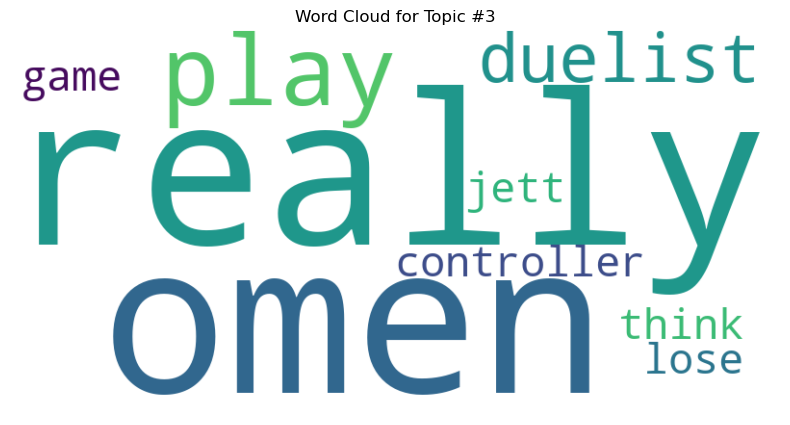

['dont', 'make', 'agent', 'im', 'say', 'want', 'like', 'time', 'think', 'play']


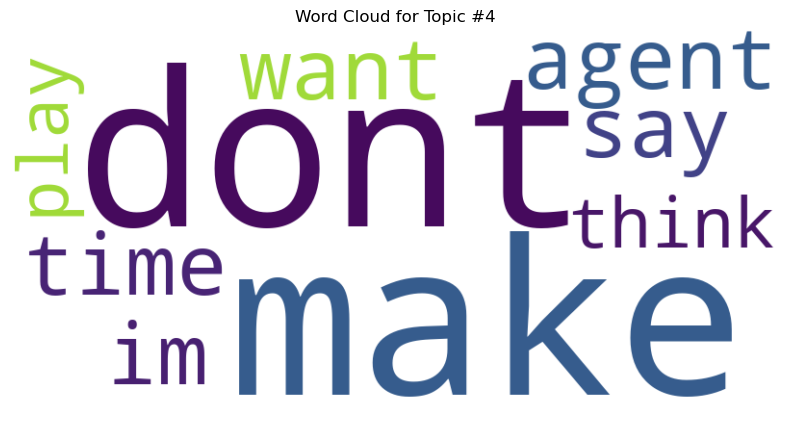

['want', 'way', 'isnt', 'val', 'rush', 'point', 'die', 'character', 'revive', 'ignore']


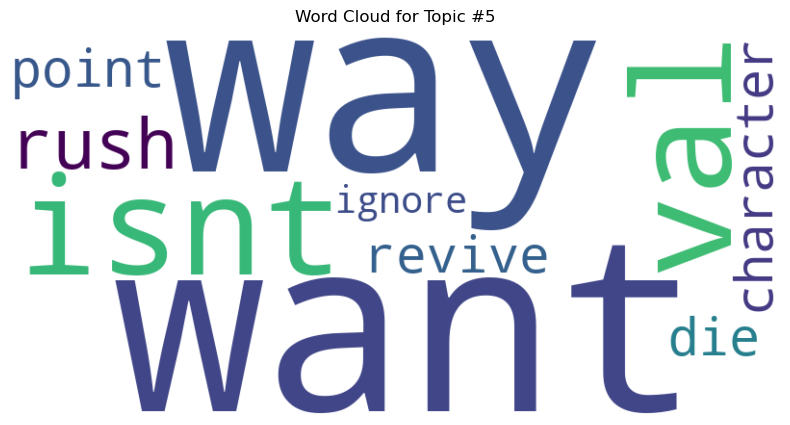

['character', 'like', 'people', 'fuck', 'hurt', 'annoy', 'game', 'harm', 'feel', 'say']


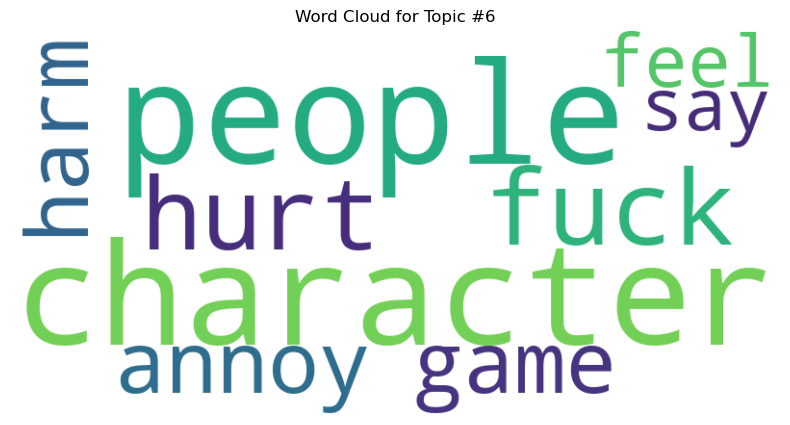

['mean', 'play', 'create', 'like', 'space', 'use', 'dead', 'game', 'people', 'smoke']


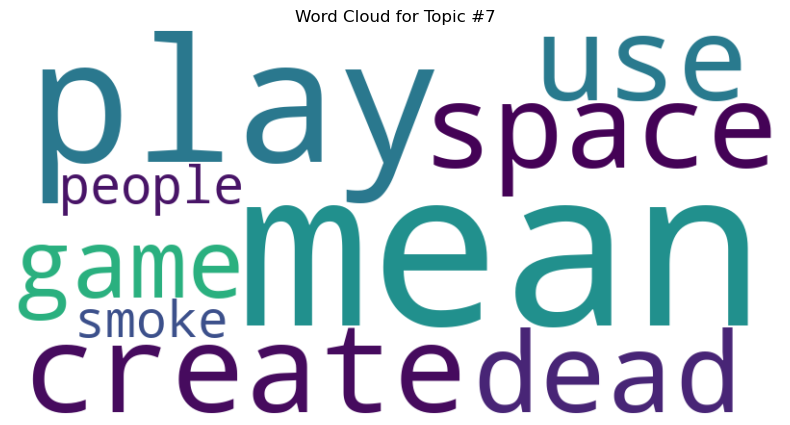

['like', 'cloves', 'dont', 'say', 'smoke', 'best', 'game', 'pronouns', 'people', 'use']


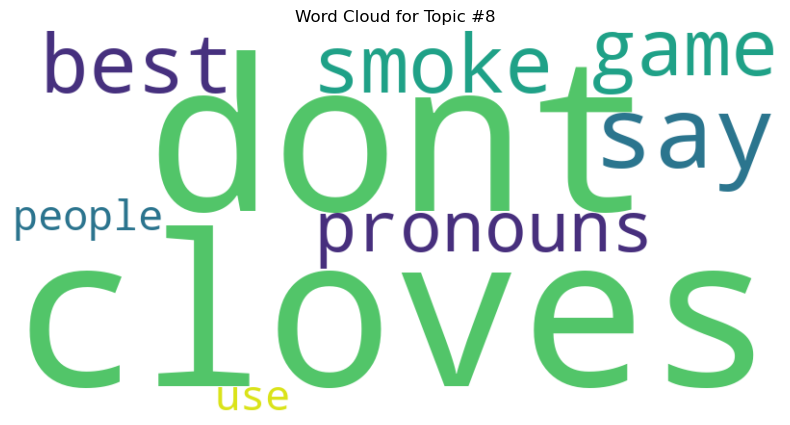

['people', 'description', 'na', 'die', 'ult', 'play', 'bug', 'ultimate', 'result', 'use']


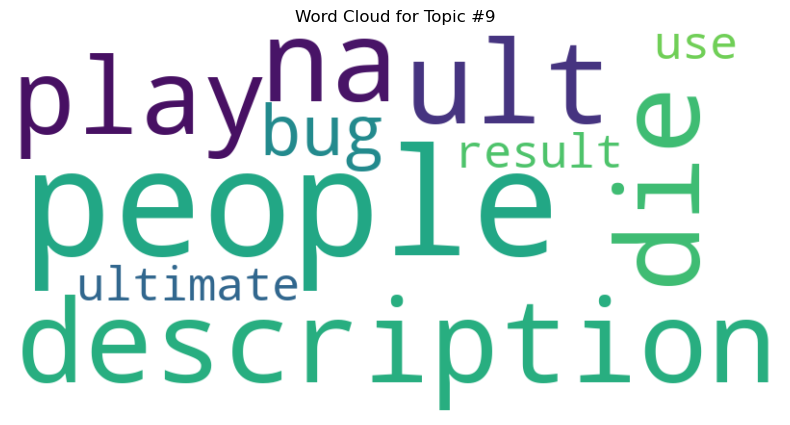

In [1]:
import pandas as pd #Provides text processing capabilities
import numpy as np #Provides Python with better math processing capabilities
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

#The next line of code reads your Reddit data into this program's memory
#Place your reddit data into the same directory of this script and change the below filename
reviews_datasets = pd.read_csv(r"C:\Users\saisa\Downloads\CIS 518 Big Data\Group Project\Pre-processed_llm_-Ve_AfterClove.csv")

reviews_datasets = reviews_datasets.head(20000) #The 20,000 number listed as a parameter here is a limitor of how many records you want to analyze. Adjust this number according to the size of your dataset and whether you run into memory limitations
reviews_datasets.dropna() #Drops any records that have a missing value

reviews_datasets.head() #Print first 5 rows to console inspect data 

#This specifies which column to extract for text analysis. It is referenced again a few lines from this comment (doc_term_matrix = count_vect...)
reviews_datasets['Text'][10]

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english') #Hyperparameters; max_df = maximum document frequency; min_df = minimum document frequency, stop words = 'english')
doc_term_matrix = count_vect.fit_transform(reviews_datasets['Text'].values.astype('U')) #Create document-term matrix
doc_term_matrix

from sklearn.decomposition import LatentDirichletAllocation #Import LDA

#n_components is how many topics you want to generate. 
#This is one of the "hyperparameters" for LDA
#Many machine learning models have similar hyperparameters
#You can adjust hyperparameters to tune model performance
LDA = LatentDirichletAllocation(n_components=10, random_state=42) #n_components = number of topics to generate; random_state = a seed to produce reproducible results
#More documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
LDA.fit(doc_term_matrix)

first_topic = LDA.components_[0]

top_topic_words = first_topic.argsort()[-10:]
       
#Prints out the most "important" words for forming topic distribution     
print("Most \"Important\" words for forming topic distribution")  
for i in top_topic_words:
    print(count_vect.get_feature_names_out()[i])
    

for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')
    
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

def generate_word_cloud(topic_words, topic_num):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(topic_words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Topic #{topic_num}')
    plt.axis('off')
    plt.show()

# Iterate over each topic and generate word cloud
for i, topic in enumerate(LDA.components_):
    top_words = [count_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    print(top_words)
    generate_word_cloud(top_words, i)

Most "Important" words for forming topic distribution
ability
cloves
lurk
agent
omen
play
team
use
think
smoke
Top 10 words for topic #0:
['ability', 'cloves', 'lurk', 'agent', 'omen', 'play', 'team', 'use', 'think', 'smoke']


Top 10 words for topic #1:
['like', 'round', 'game', 'play', 'cloves', 'good', 'ult', 'die', 'people', 'use']


Top 10 words for topic #2:
['main', 'team', 'good', 'think', 'controller', 'omen', 'smoke', 'people', 'like', 'play']


Top 10 words for topic #3:
['utility', 'good', 'think', 'viper', 'ppl', 'team', 'omen', 'like', 'smoke', 'play']


Top 10 words for topic #4:
['play', 'know', 'butterfly', 'brim', 'feel', 'like', 'heal', 'overheal', 'smoke', 'omen']


Top 10 words for topic #5:
['dont', 'duelist', 'team', 'like', 'smoke', 'round', 'say', 'ult', 'play', 'die']


Top 10 words for topic #6:
['use', 'main', 'agent', 'really', 'die', 'smoke', 'controller', 'game', 'play', 'like']


Top 10 words for topic #7:
['think', 'im', 'know', 'pronouns', 'like', 'don

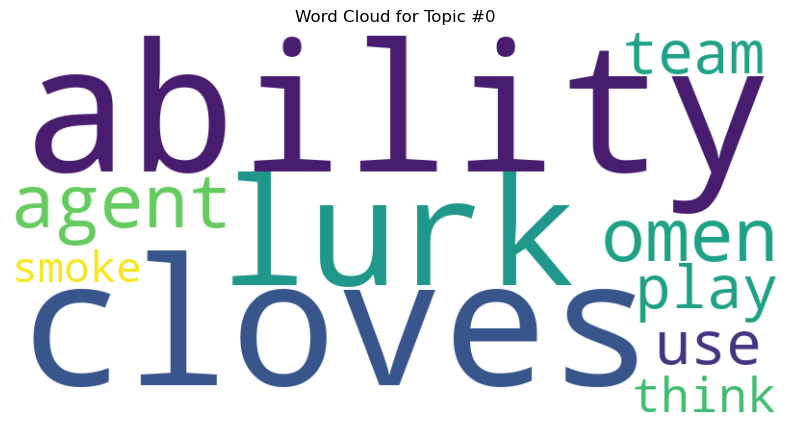

['like', 'round', 'game', 'play', 'cloves', 'good', 'ult', 'die', 'people', 'use']


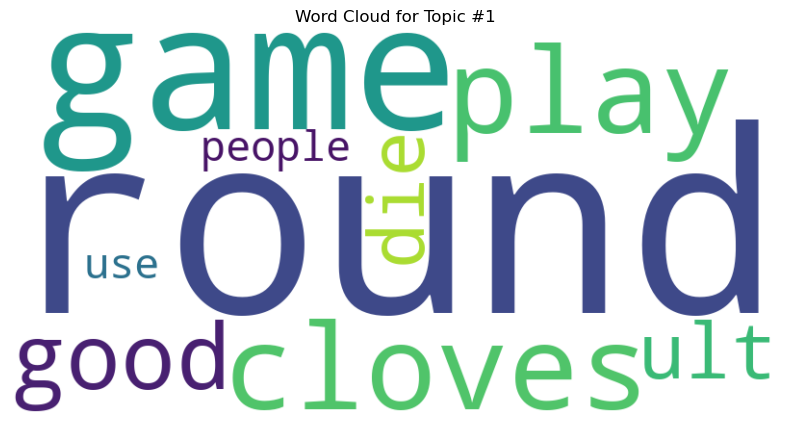

['main', 'team', 'good', 'think', 'controller', 'omen', 'smoke', 'people', 'like', 'play']


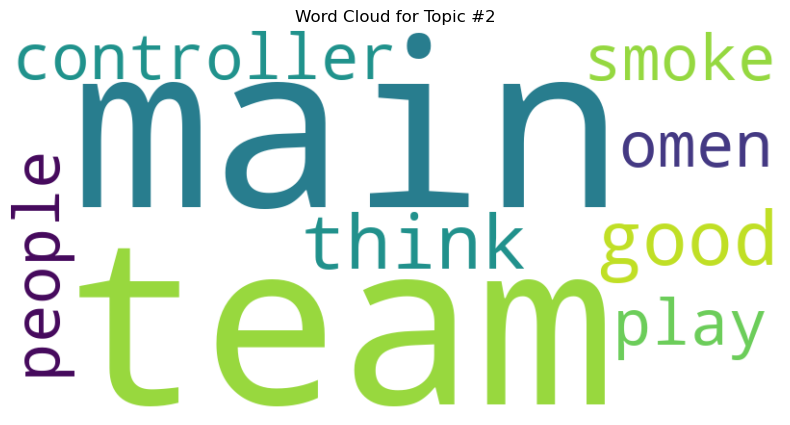

['utility', 'good', 'think', 'viper', 'ppl', 'team', 'omen', 'like', 'smoke', 'play']


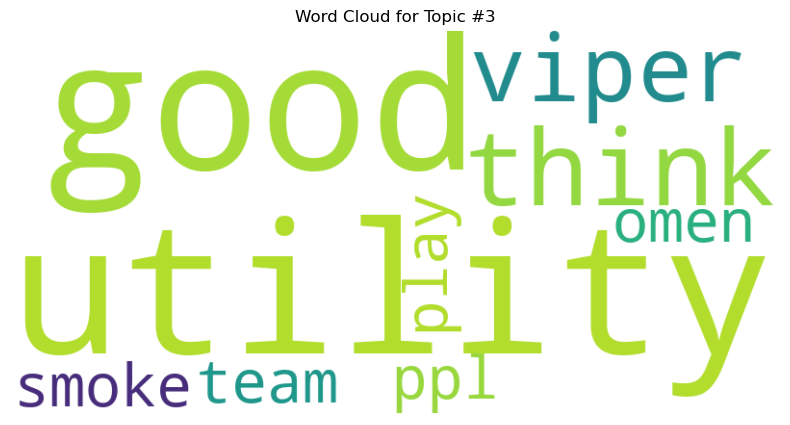

['play', 'know', 'butterfly', 'brim', 'feel', 'like', 'heal', 'overheal', 'smoke', 'omen']


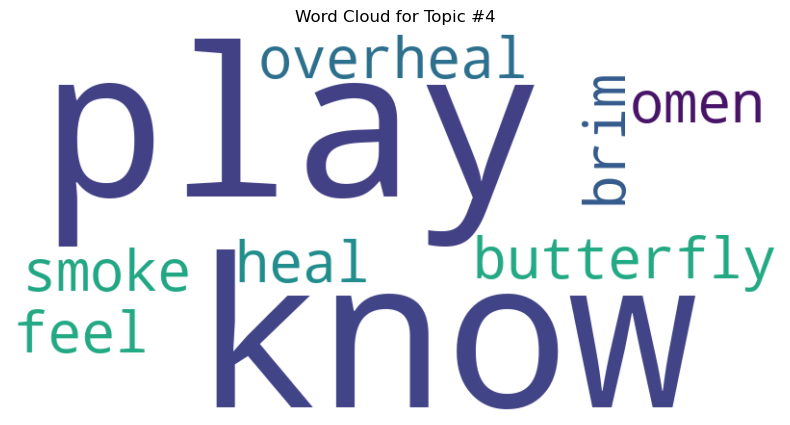

['dont', 'duelist', 'team', 'like', 'smoke', 'round', 'say', 'ult', 'play', 'die']


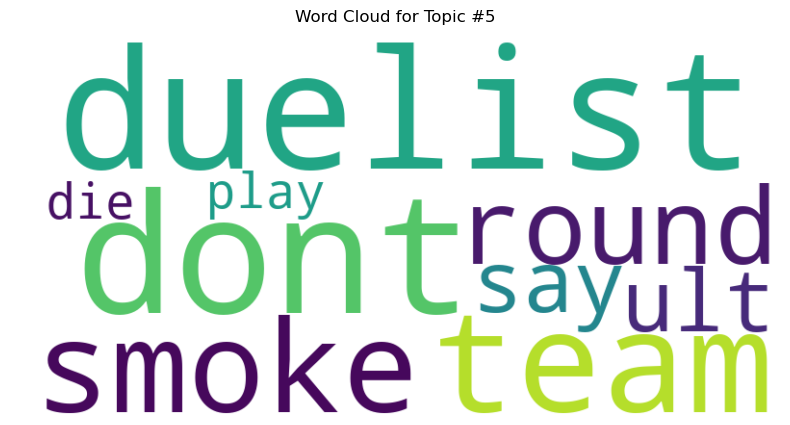

['use', 'main', 'agent', 'really', 'die', 'smoke', 'controller', 'game', 'play', 'like']


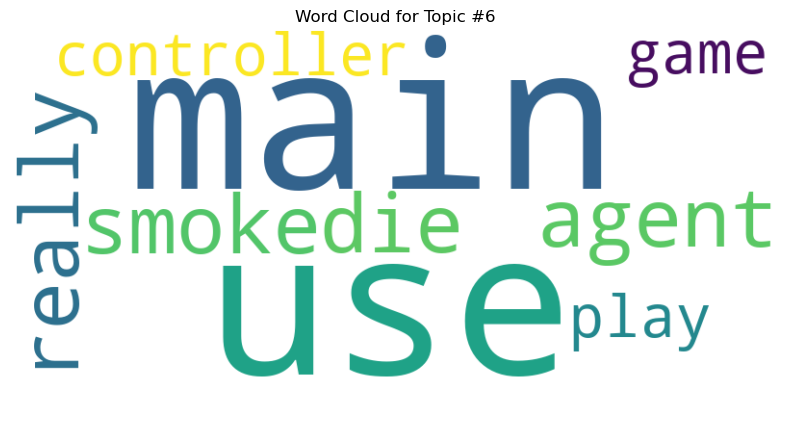

['think', 'im', 'know', 'pronouns', 'like', 'dont', 'people', 'make', 'use', 'say']


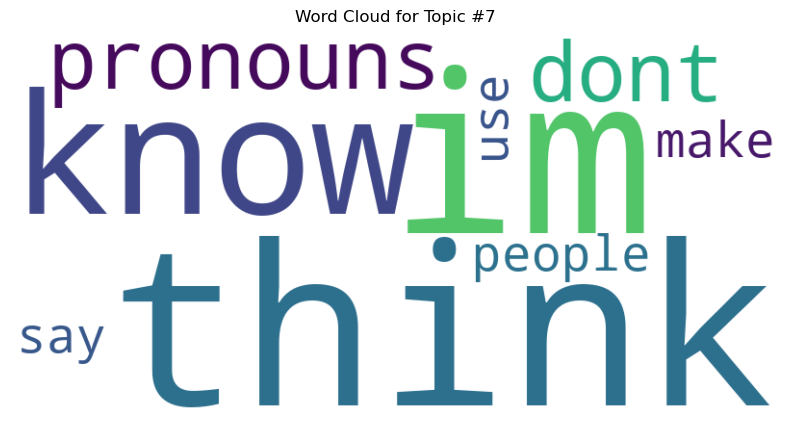

['space', 'nerfed', 'sure', 'think', 'team', 'death', 'players', 'astra', 'agent', 'reyna']


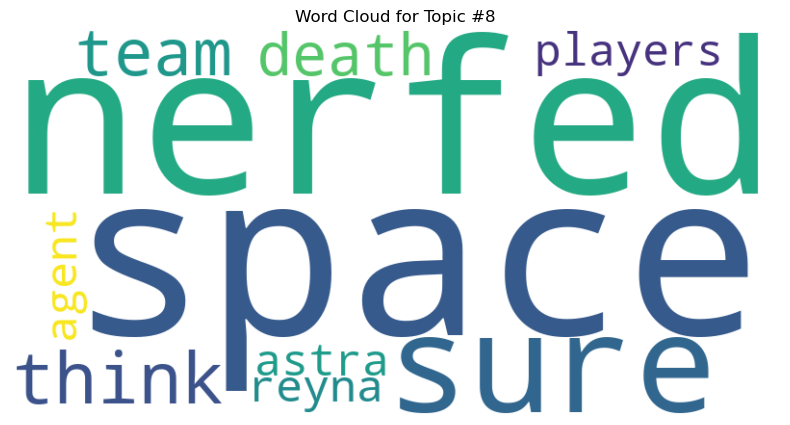

['controller', 'ability', 'omen', 'game', 'play', 'use', 'viper', 'like', 'think', 'smoke']


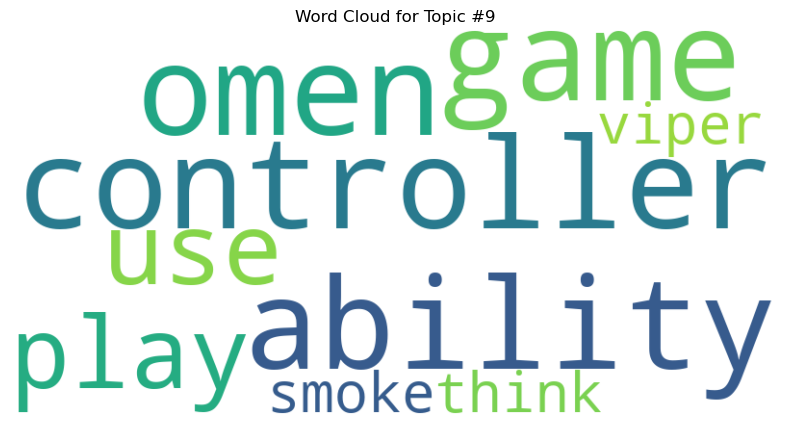

In [2]:
import pandas as pd #Provides text processing capabilities
import numpy as np #Provides Python with better math processing capabilities
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

#The next line of code reads your Reddit data into this program's memory
#Place your reddit data into the same directory of this script and change the below filename
reviews_datasets = pd.read_csv(r"C:\Users\saisa\Downloads\CIS 518 Big Data\Group Project\Pre-processed_llm_+Ve_AfterClove.csv")

reviews_datasets = reviews_datasets.head(20000) #The 20,000 number listed as a parameter here is a limitor of how many records you want to analyze. Adjust this number according to the size of your dataset and whether you run into memory limitations
reviews_datasets.dropna() #Drops any records that have a missing value

reviews_datasets.head() #Print first 5 rows to console inspect data 

#This specifies which column to extract for text analysis. It is referenced again a few lines from this comment (doc_term_matrix = count_vect...)
reviews_datasets['Text'][10]

count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english') #Hyperparameters; max_df = maximum document frequency; min_df = minimum document frequency, stop words = 'english')
doc_term_matrix = count_vect.fit_transform(reviews_datasets['Text'].values.astype('U')) #Create document-term matrix
doc_term_matrix

from sklearn.decomposition import LatentDirichletAllocation #Import LDA

#n_components is how many topics you want to generate. 
#This is one of the "hyperparameters" for LDA
#Many machine learning models have similar hyperparameters
#You can adjust hyperparameters to tune model performance
LDA = LatentDirichletAllocation(n_components=10, random_state=42) #n_components = number of topics to generate; random_state = a seed to produce reproducible results
#More documentation here: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html
LDA.fit(doc_term_matrix)

first_topic = LDA.components_[0]

top_topic_words = first_topic.argsort()[-10:]
       
#Prints out the most "important" words for forming topic distribution     
print("Most \"Important\" words for forming topic distribution")  
for i in top_topic_words:
    print(count_vect.get_feature_names_out()[i])
    

for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')
    
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

def generate_word_cloud(topic_words, topic_num):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(topic_words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Topic #{topic_num}')
    plt.axis('off')
    plt.show()

# Iterate over each topic and generate word cloud
for i, topic in enumerate(LDA.components_):
    top_words = [count_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:]]
    print(top_words)
    generate_word_cloud(top_words, i)

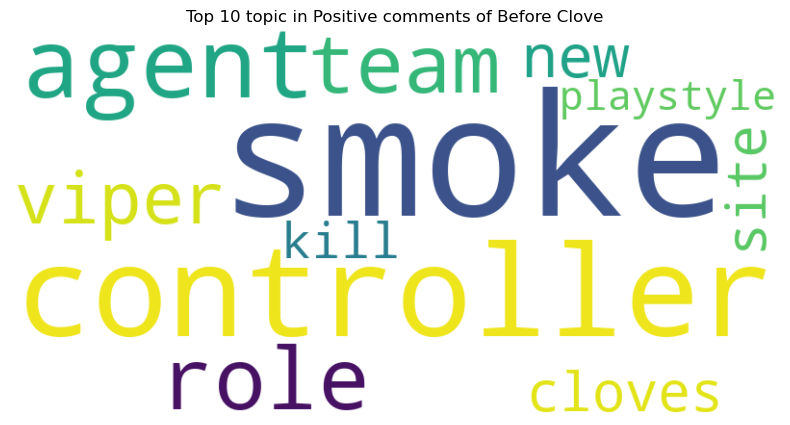

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Read the CSV document into a Pandas DataFrame
reviews_datasets = pd.read_csv(r"C:\Users\saisa\Downloads\CIS 518 Big Data\Group Project\Pre-processed_llm_+Ve_BeforeClove.csv")

# Extract the text column from the DataFrame
text_column = reviews_datasets['Text']

# Define the specific words you want to count occurrences for
specific_words = ['controller', 'viper', 'smoke', 'new', 'cloves', 'site', 'agent', 'team', 'kill', 'role', 'playstyle']

# Count the occurrences of each specific word in the text column
word_counts = {word: text_column.str.count(word).sum() for word in specific_words}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top 10 topic in Positive comments of Before Clove')
plt.axis('off')
plt.show()

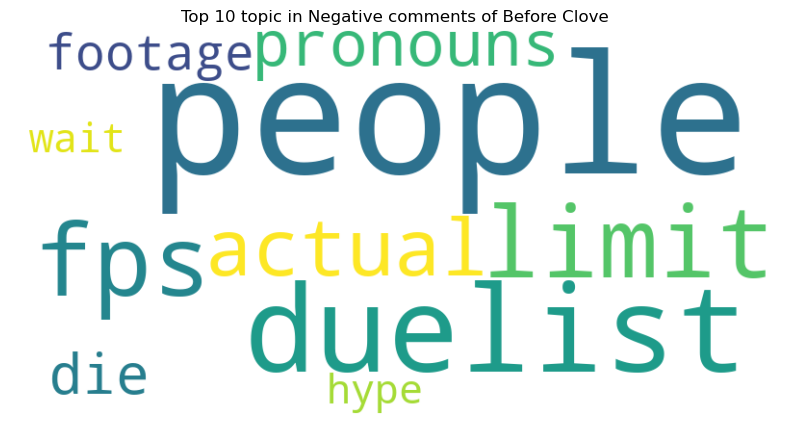

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Read the CSV document into a Pandas DataFrame
reviews_datasets = pd.read_csv(r"C:\Users\saisa\Downloads\CIS 518 Big Data\Group Project\Pre-processed_llm_-Ve_BeforeClove.csv")

# Extract the text column from the DataFrame
text_column = reviews_datasets['Text']

# Define the specific words you want to count occurrences for
specific_words = ['people', 'die', 'hype', 'actual', 'footage', 'wait', 'pronouns', 'limit', 'duelist', 'fps']

# Count the occurrences of each specific word in the text column
word_counts = {word: text_column.str.count(word).sum() for word in specific_words}

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Top 10 topic in Negative comments of Before Clove')
plt.axis('off')
plt.show()